In [218]:
# lib for extraction ,manipulation,analysis
import numpy as np
import pandas as pd
# for visualtion
import matplotlib.pyplot as plt
import seaborn as sns
# for stats
import scipy.stats 
from scipy.stats import shapiro, chi2, normaltest, kstest, zscore
# train test split
from sklearn.model_selection import train_test_split

In [219]:
# importing dataset
Train_data=pd.read_csv(r"C:\Users\deshm\OneDrive\Desktop\Python\Flight Price Prediction\Data_Train.csv")
Train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [220]:
Test_data=pd.read_csv(r"C:\Users\deshm\OneDrive\Desktop\Python\Flight Price Prediction\Test_set.csv")
Test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [221]:
#EDA for each data analysis
def eda(Test_data):
    print("Shape:",Test_data.shape)
    print("Size:",Test_data.size)
    print("INFO:",Test_data.info)
    print("Describe:",Test_data.describe())
    print("Dtype:",Test_data.dtypes)
    print("Checking Null Values:",Test_data.isnull().sum())

eda(Test_data)

Shape: (2671, 10)
Size: 26710
INFO: <bound method DataFrame.info of                 Airline Date_of_Journey    Source Destination  \
0           Jet Airways       6/06/2019     Delhi      Cochin   
1                IndiGo      12/05/2019   Kolkata    Banglore   
2           Jet Airways      21/05/2019     Delhi      Cochin   
3     Multiple carriers      21/05/2019     Delhi      Cochin   
4              Air Asia      24/06/2019  Banglore       Delhi   
...                 ...             ...       ...         ...   
2666          Air India       6/06/2019   Kolkata    Banglore   
2667             IndiGo      27/03/2019   Kolkata    Banglore   
2668        Jet Airways       6/03/2019     Delhi      Cochin   
2669          Air India       6/03/2019     Delhi      Cochin   
2670  Multiple carriers      15/06/2019     Delhi      Cochin   

                Route Dep_Time  Arrival_Time Duration Total_Stops  \
0     DEL ? BOM ? COK    17:30  04:25 07 Jun  10h 55m      1 stop   
1     CCU ? M

In [222]:
def eda(Train_data):
    print("Shape:",Train_data.shape)
    print("Size:",Train_data.size)
    print("INFO:",Train_data.info)
    print("Describe:",Train_data.describe())
    print("Dtype:",Train_data.dtypes)
    print("Checking Null Values:",Train_data.isnull().sum())

eda(Train_data)

Shape: (10683, 11)
Size: 117513
INFO: <bound method DataFrame.info of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR ? DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU ? IXR ? BBI ? BLR    05:50         13:15   7h 

In [223]:
Test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [224]:
Train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [225]:
Train_data['Route']=Train_data['Route'].fillna(Train_data['Route'].mode()[0])

In [226]:
Train_data['Total_Stops']=Train_data['Total_Stops'].fillna(Train_data['Total_Stops'].mode()[0])

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_categorical_columns_with_viz(data, columns=None, max_categories=10):
    if columns is None:
        # Automatically select columns with dtype 'object' or 'category'
        columns = data.select_dtypes(include=['object', 'category']).columns

    results = []

    for col in columns:
        col_data = data[col]
        unique_values = col_data.nunique()
        top_category = col_data.mode()[0] if not col_data.mode().empty else None
        top_frequency = col_data.value_counts().iloc[0] if not col_data.value_counts().empty else None
        total_values = len(col_data)
        missing_values = col_data.isnull().sum()
        proportions = (col_data.value_counts(normalize=True) * 100).to_dict()
        
        results.append({
            'Column': col,
            'Unique Values': unique_values,
            'Top Category': top_category,
            'Top Frequency': top_frequency,
            'Total Values': total_values,
            'Missing Values': missing_values,
            'Proportions': proportions
        })
        
        # Plot the distribution of categories
        plt.figure(figsize=(10, 6))
        value_counts = col_data.value_counts().head(max_categories)
        sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")
        plt.title(f"Distribution of {col} (Top {max_categories})", fontsize=14)
        plt.xlabel('Count', fontsize=12)
        plt.ylabel('Categories', fontsize=12)
        plt.show()

    return pd.DataFrame(results)

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\755114205.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


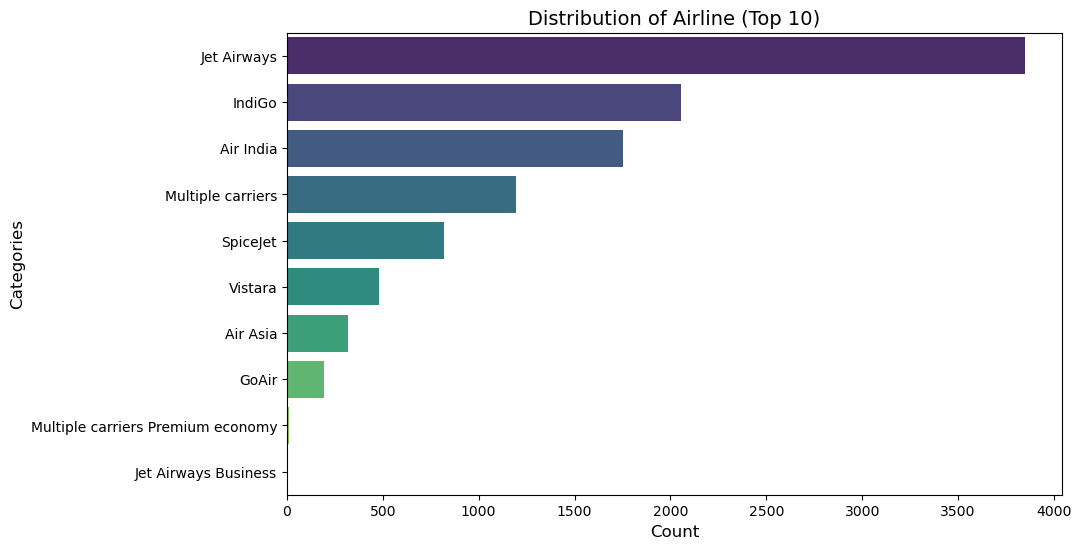

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\755114205.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


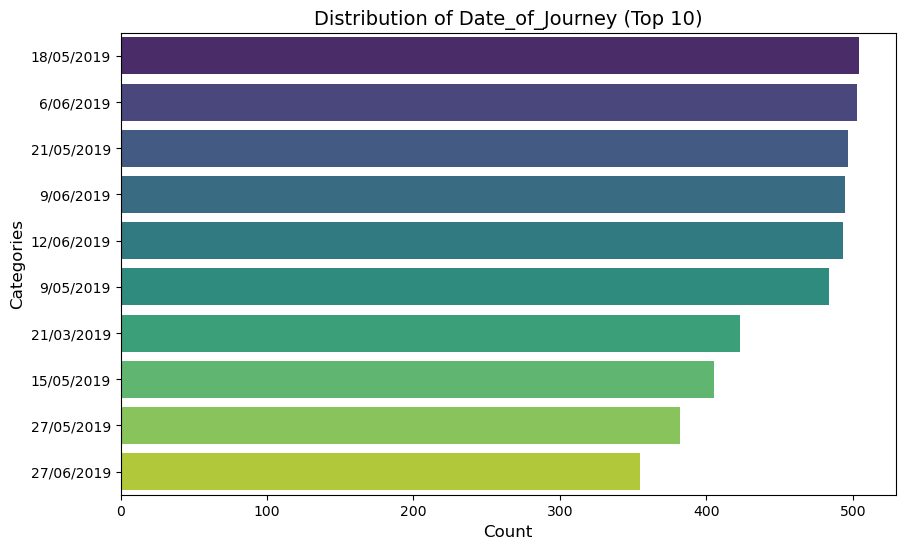

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\755114205.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


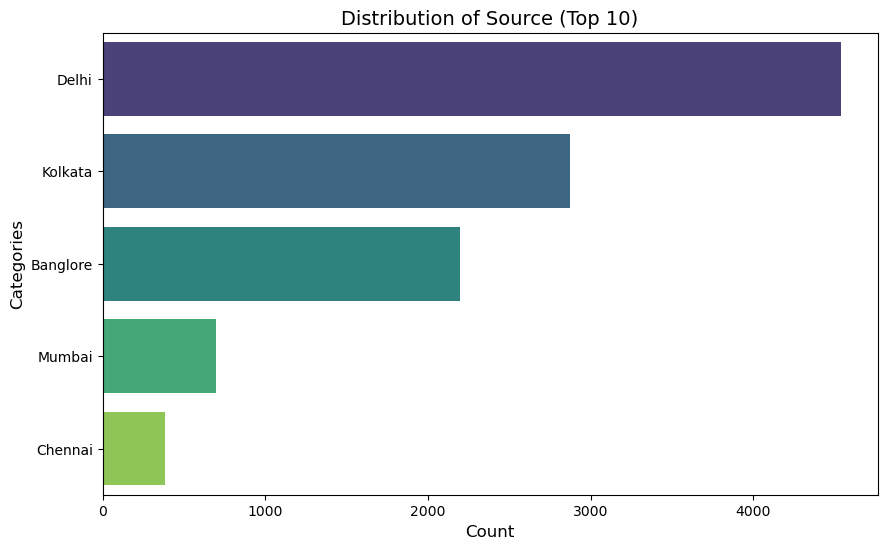

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\755114205.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


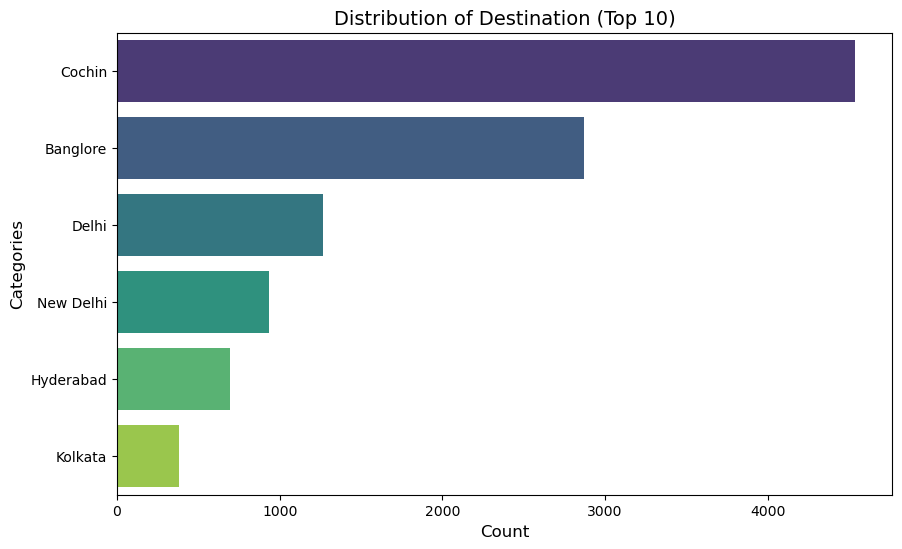

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\755114205.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


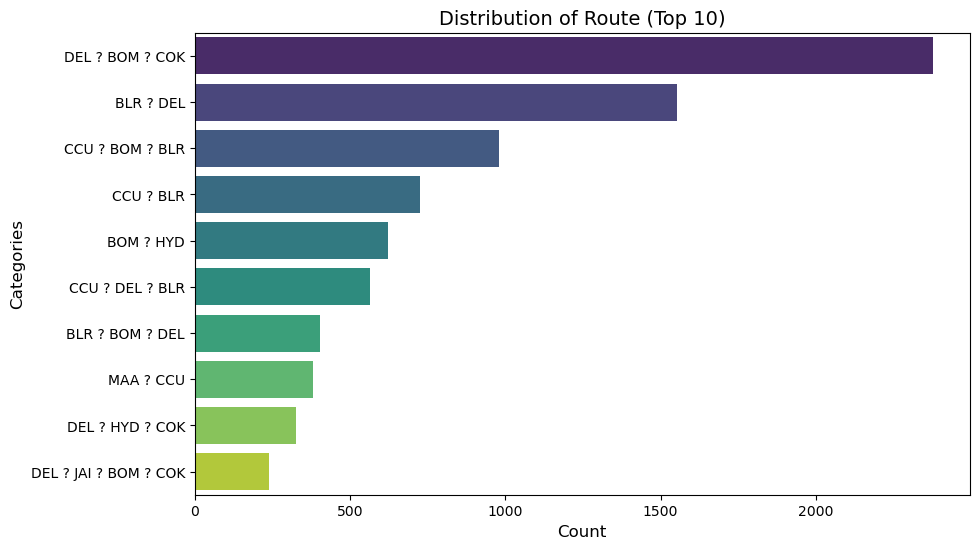

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\755114205.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


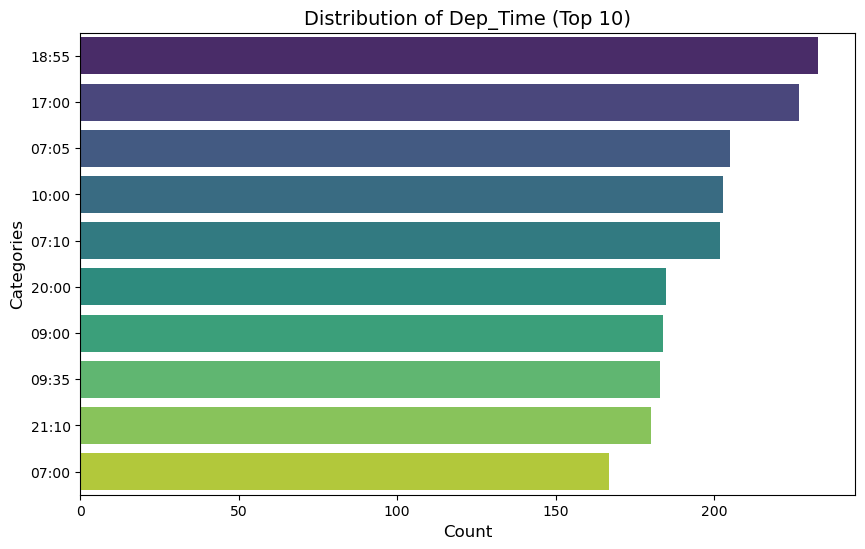

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\755114205.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


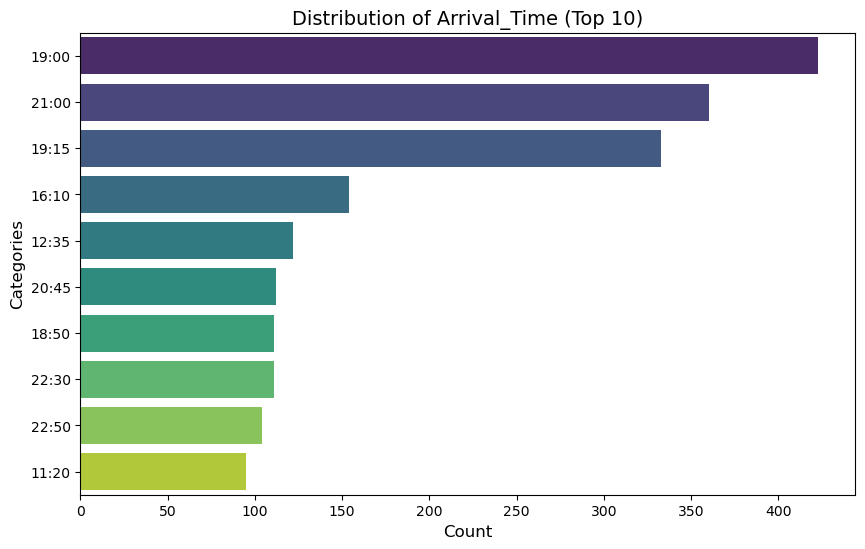

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\755114205.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


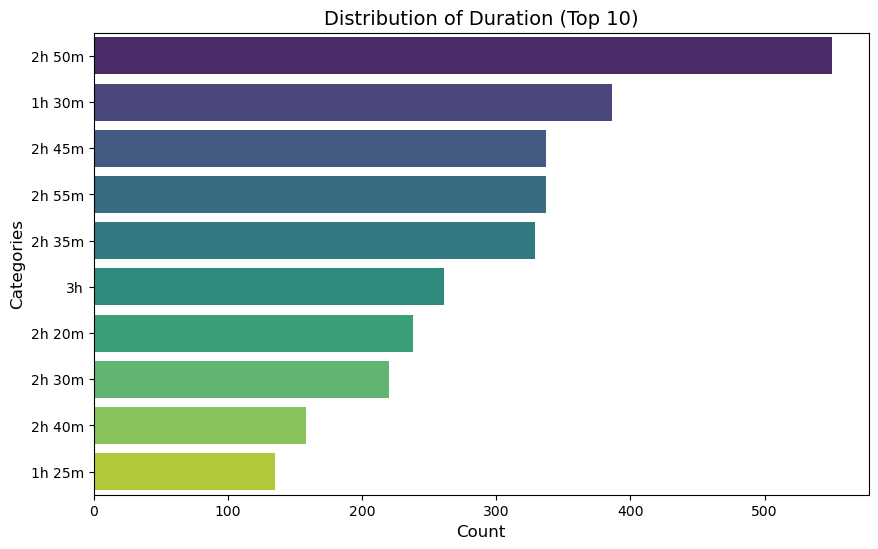

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\755114205.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


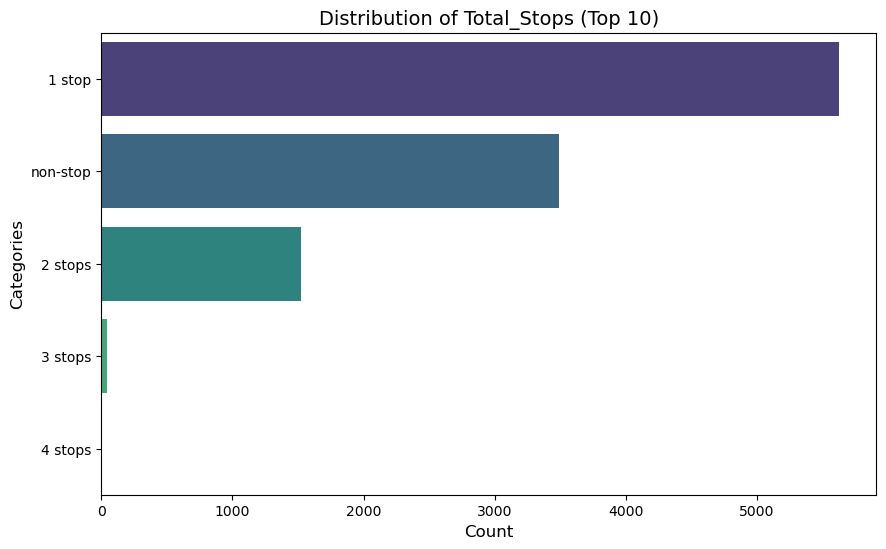

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\755114205.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.values, y=value_counts.index, palette="viridis")


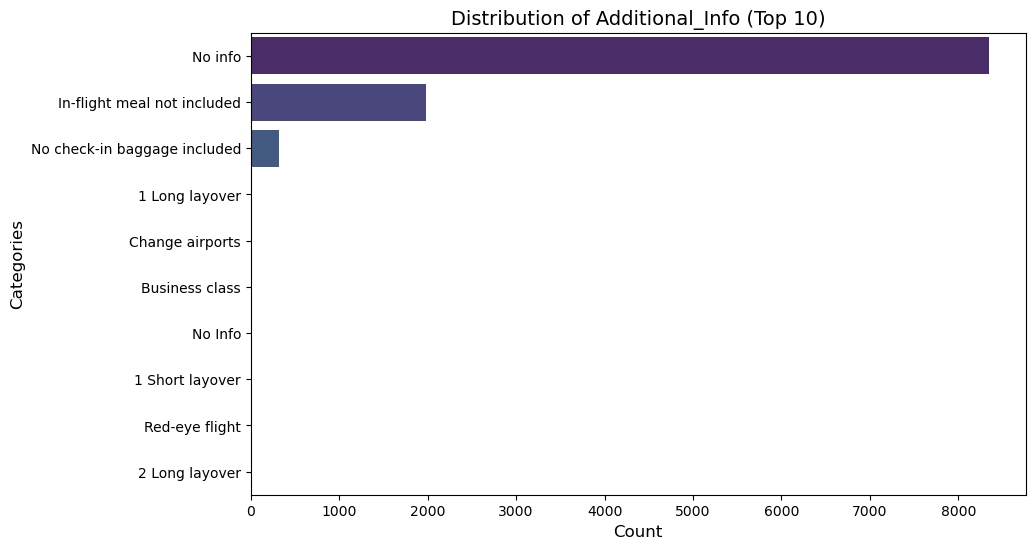

,Column,Unique Values,Top Category,Top Frequency,Total Values,Missing Values,Proportions
0,Airline,12,Jet Airways,3849,10683,0,"{'Jet Airways': 36.02920527941589, 'IndiGo': 1..."
1,Date_of_Journey,44,18/05/2019,504,10683,0,"{'18/05/2019': 4.717775905644482, '6/06/2019':..."
2,Source,5,Delhi,4537,10683,0,"{'Delhi': 42.46934381727979, 'Kolkata': 26.874..."
3,Destination,6,Cochin,4537,10683,0,"{'Cochin': 42.46934381727979, 'Banglore': 26.8..."
4,Route,128,DEL ? BOM ? COK,2377,10683,0,"{'DEL ? BOM ? COK': 22.25030422166058, 'BLR ? ..."
5,Dep_Time,222,18:55,233,10683,0,"{'18:55': 2.1810352897126273, '17:00': 2.12487..."
6,Arrival_Time,1343,19:00,423,10683,0,"{'19:00': 3.9595619208087616, '21:00': 3.36983..."
7,Duration,368,2h 50m,550,10683,0,"{'2h 50m': 5.148366563699335, '1h 30m': 3.6132..."
8,Total_Stops,5,1 stop,5626,10683,0,"{'1 stop': 52.66310961340448, 'non-stop': 32.6..."
9,Additional_Info,10,No info,8345,10683,0,"{'No info': 78.1147617710381, 'In-flight meal ..."


In [228]:
analyze_categorical_columns_with_viz(Train_data, columns=None, max_categories=10)

In [229]:
Train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [230]:
# Analysis of Date_of_Journey
# convert into datetime format
Train_data['Date_of_Journey']=pd.to_datetime(Train_data['Date_of_Journey'],format='%d/%m/%Y')
Test_data['Date_of_Journey']=pd.to_datetime(Test_data['Date_of_Journey'],format='%d/%m/%Y')

In [231]:
# split by day, month, weekdays
Train_data['Journey_Day']=Train_data['Date_of_Journey'].dt.day
Train_data['Journey_Month']=Train_data['Date_of_Journey'].dt.month
Train_data['Journey_Weekdays']=Train_data['Date_of_Journey'].dt.weekday

Test_data['Journey_Day']=Test_data['Date_of_Journey'].dt.day
Test_data['Journey_Month']=Test_data['Date_of_Journey'].dt.month
Test_data['Journey_Weekdays']=Test_data['Date_of_Journey'].dt.weekday

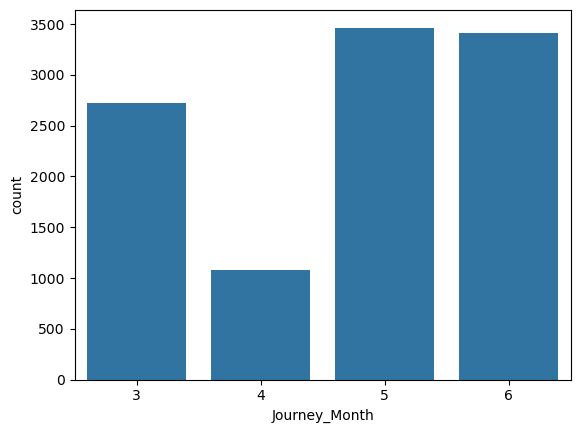

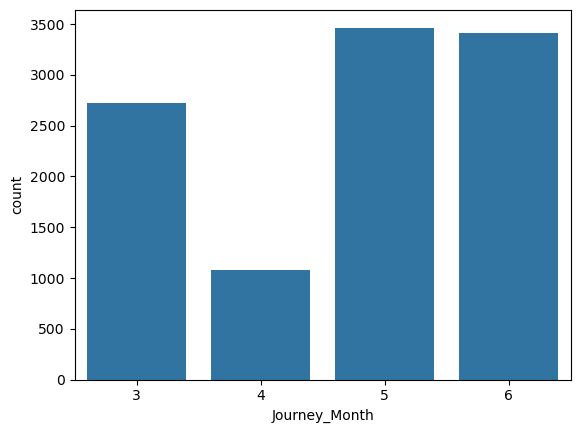

In [232]:
sns.countplot(x='Journey_Month',data=Train_data)
plt.show()
sns.countplot(x='Journey_Month',data=Train_data)
plt.show()

In [233]:
Train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Weekdays
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,2019-05-01,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,6
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,1
10679,Air India,2019-04-27,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,5
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,5
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,4


In [234]:
# Convert to datetime
Train_data["Dep_Hour"]=pd.to_datetime(Train_data["Dep_Time"]).dt.hour
Train_data["Dep_Minute"]=pd.to_datetime(Train_data["Dep_Time"]).dt.minute
Train_data["Arrival_Hour"]=pd.to_datetime(Train_data["Arrival_Time"]).dt.hour
Train_data["Arrival_Minute"]=pd.to_datetime(Train_data["Arrival_Time"]).dt.minute

Test_data["Dep_Hour"]=pd.to_datetime(Test_data["Dep_Time"]).dt.hour
Test_data["Dep_Minute"]=pd.to_datetime(Test_data["Dep_Time"]).dt.minute
Test_data["Arrival_Hour"]=pd.to_datetime(Test_data["Arrival_Time"]).dt.hour
Test_data["Arrival_Minute"]=pd.to_datetime(Test_data["Arrival_Time"]).dt.minute

# plot distribution of departure and arrival hours
plt.figure(figsize=(20, 10))
sns.histplot(train_data["Dep_Hour"], kde=True, label="Departure Hour")
sns.histplot(train_data["Arrival_Hour"], kde=True, label="Arrival Hour")
plt.legend()
plt.title("Distribution of Departure and Arrival Hours")
plt.show()

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\38725633.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Train_data["Dep_Hour"]=pd.to_datetime(Train_data["Dep_Time"]).dt.hour
C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\38725633.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Train_data["Dep_Minute"]=pd.to_datetime(Train_data["Dep_Time"]).dt.minute
C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\38725633.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Train_data["Arrival_Hour"]=pd.to_datetime(Train_data["Arrival_Time"]).dt.hour
C:\Users\deshm\AppData\Lo

NameError: name 'train_data' is not defined

<Figure size 2000x1000 with 0 Axes>

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\3938593015.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Train_data["Dep_Hour"] = pd.to_datetime(Train_data["Dep_Time"], errors='coerce').dt.hour
C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\3938593015.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Train_data["Dep_Minute"] = pd.to_datetime(Train_data["Dep_Time"], errors='coerce').dt.minute
C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\3938593015.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Train_data["Arrival_Hour"] = pd.to_datetime(Train_data["Arr

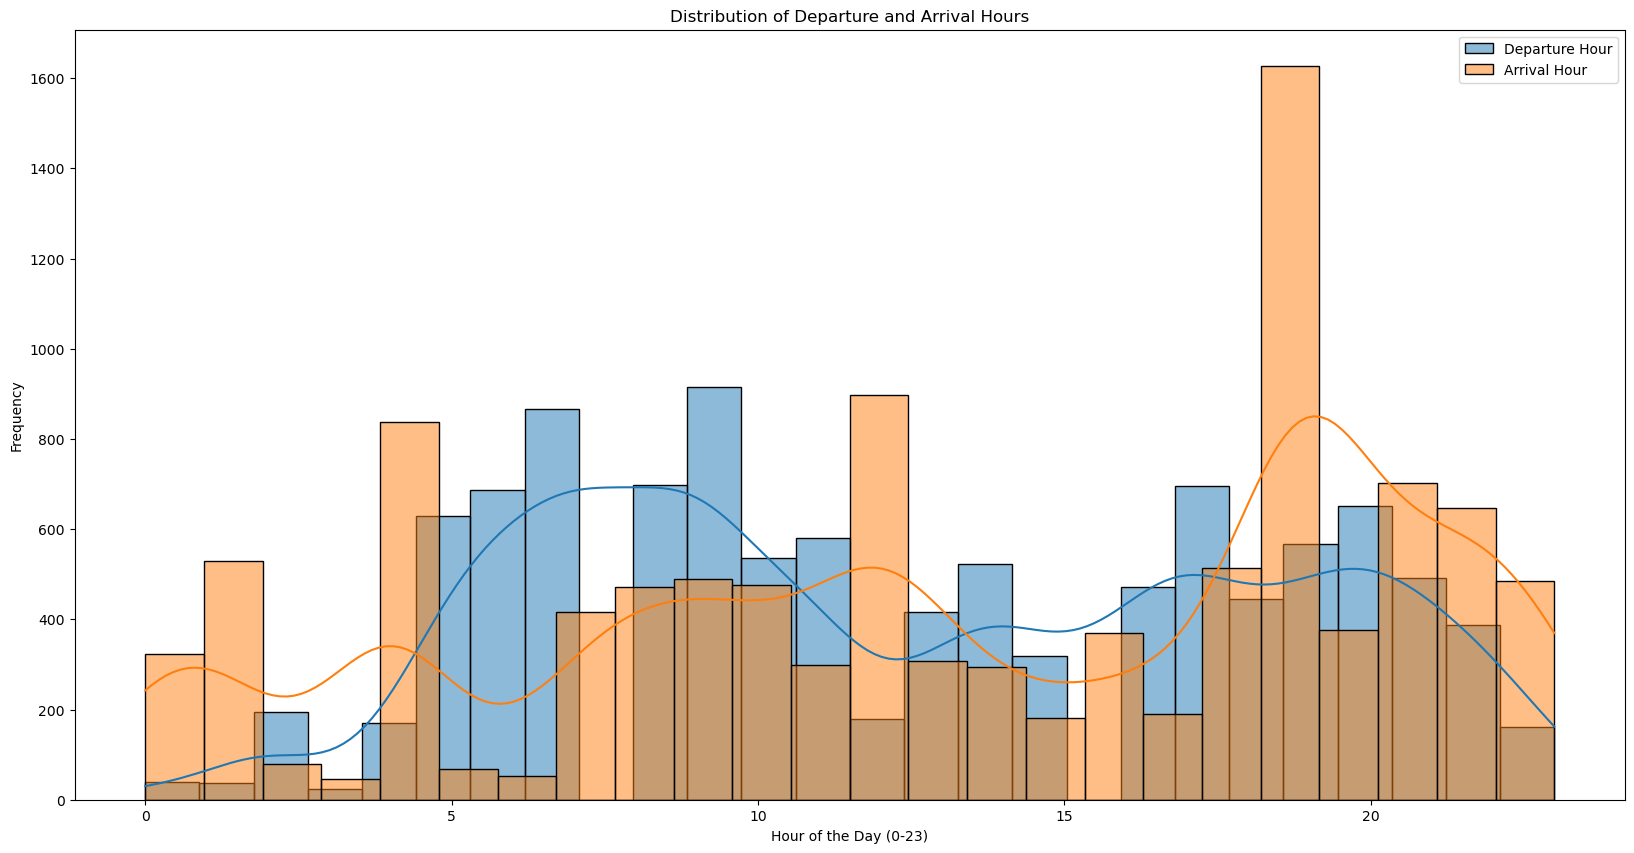

In [242]:

# Convert Dep_Time and Arrival_Time into Hours and Minutes for Train Data
Train_data["Dep_Hour"] = pd.to_datetime(Train_data["Dep_Time"], errors='coerce').dt.hour
Train_data["Dep_Minute"] = pd.to_datetime(Train_data["Dep_Time"], errors='coerce').dt.minute
Train_data["Arrival_Hour"] = pd.to_datetime(Train_data["Arrival_Time"], errors='coerce').dt.hour
Train_data["Arrival_Minute"] = pd.to_datetime(Train_data["Arrival_Time"], errors='coerce').dt.minute

# Convert Dep_Time and Arrival_Time into Hours and Minutes for Test Data
Test_data["Dep_Hour"] = pd.to_datetime(Test_data["Dep_Time"], errors='coerce').dt.hour
Test_data["Dep_Minute"] = pd.to_datetime(Test_data["Dep_Time"], errors='coerce').dt.minute
Test_data["Arrival_Hour"] = pd.to_datetime(Test_data["Arrival_Time"], errors='coerce').dt.hour
Test_data["Arrival_Minute"] = pd.to_datetime(Test_data["Arrival_Time"], errors='coerce').dt.minute

# Plot Distribution of Departure and Arrival Hours for Train Data
plt.figure(figsize=(20, 10))
sns.histplot(Train_data["Dep_Hour"].dropna(), kde=True, label="Departure Hour")
sns.histplot(Train_data["Arrival_Hour"].dropna(), kde=True, label="Arrival Hour")
plt.legend()
plt.title("Distribution of Departure and Arrival Hours")
plt.xlabel("Hour of the Day (0-23)")
plt.ylabel("Frequency")
plt.show()


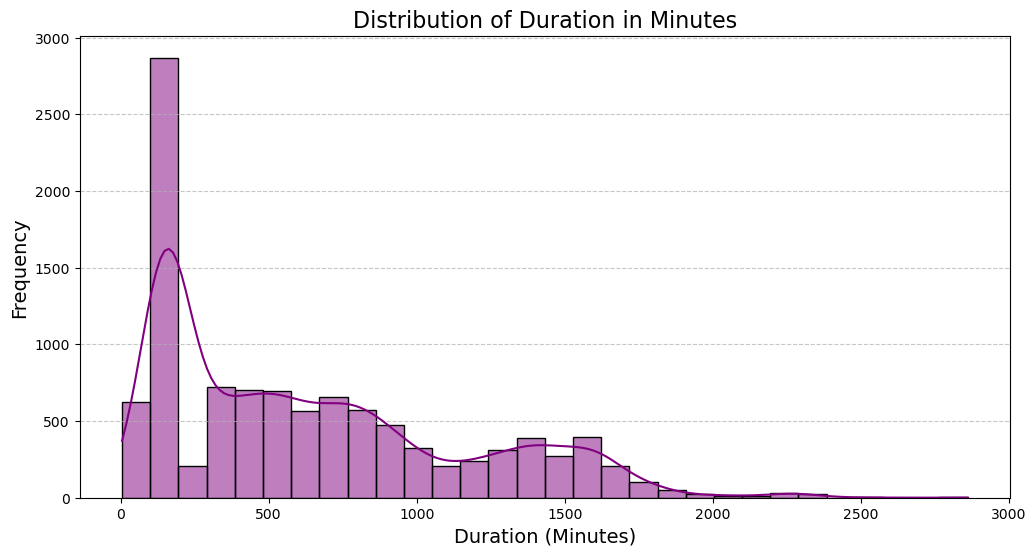

In [244]:
# Convert duration to minutes
def duration_to_minutes(duration):
    hours = 0
    minutes = 0
    if pd.isnull(duration): 
        return None
    if 'h' in duration:
        hours = int(duration.split("h")[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].replace('m', '').strip())
    return hours * 60 + minutes
    
Train_data["Duration_Minutes"] = Train_data["Duration"].apply(duration_to_minutes)
Test_data["Duration_Minutes"] = Test_data["Duration"].apply(duration_to_minutes)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.histplot(Train_data["Duration_Minutes"].dropna(), kde=True, color="purple", bins=30)
plt.title("Distribution of Duration in Minutes", fontsize=16)
plt.xlabel("Duration (Minutes)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [246]:
# Encoding
# Airline Colume
Train_data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [252]:
Train_data["Airline"]=Train_data["Airline"].replace({'IndiGo':0, 'Air India':1, 'Jet Airways':2, 'SpiceJet':3,
       'Multiple carriers':4, 'GoAir':5, 'Vistara':6, 'Air Asia':7,
       'Vistara Premium economy':8, 'Jet Airways Business':9,
       'Multiple carriers Premium economy':10, 'Trujet':11})

In [254]:
Train_data.drop(columns=["Date_of_Journey"], inplace=True)
Test_data.drop(columns=["Date_of_Journey"], inplace=True)

In [256]:
# Source Colume
Train_data["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [258]:
# Define the mapping for the cities
Source= {
    'Banglore': 1,
    'Kolkata': 2,
    'Delhi': 3,
    'Chennai': 4,
    'Mumbai': 5
}

Train_data["Source"] = Train_data["Source"].replace(city_mapping)
Test_data["Source"] = Test_data["Source"].replace(city_mapping)

# Display the mapping and encoded column
print("Source:", Source)
print(Train_data[["Source", "Source"]].head())


Source: {'Banglore': 1, 'Kolkata': 2, 'Delhi': 3, 'Chennai': 4, 'Mumbai': 5}
   Source  Source
0       1       1
1       2       2
2       3       3
3       2       2
4       1       1


C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\484868162.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Train_data["Source"] = Train_data["Source"].replace(city_mapping)
C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\484868162.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Test_data["Source"] = Test_data["Source"].replace(city_mapping)


In [260]:
# Destination Column 
Train_data["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [262]:
Train_data["Destination"]=Train_data["Destination"].replace({'New Delhi':1, 'Banglore':2, 'Cochin':3, 'Kolkata':4, 'Delhi':5, 'Hyderabad':6})

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\3925172022.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Train_data["Destination"]=Train_data["Destination"].replace({'New Delhi':1, 'Banglore':2, 'Cochin':3, 'Kolkata':4, 'Delhi':5, 'Hyderabad':6})


In [264]:
Test_data["Destination"]=Test_data["Destination"].replace({'New Delhi':1, 'Banglore':2, 'Cochin':3, 'Kolkata':4, 'Delhi':5, 'Hyderabad':6})

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\2952440239.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Test_data["Destination"]=Test_data["Destination"].replace({'New Delhi':1, 'Banglore':2, 'Cochin':3, 'Kolkata':4, 'Delhi':5, 'Hyderabad':6})


In [266]:
# Route Column
Test_data["Route"].unique()

array(['DEL ? BOM ? COK', 'CCU ? MAA ? BLR', 'BLR ? DEL',
       'BLR ? TRV ? DEL', 'CCU ? HYD ? BLR', 'CCU ? BLR',
       'CCU ? BOM ? BLR', 'DEL ? MAA ? BOM ? COK', 'DEL ? HYD ? COK',
       'BLR ? BOM ? DEL', 'CCU ? DEL ? BLR', 'DEL ? JAI ? BOM ? COK',
       'DEL ? BHO ? BOM ? COK', 'BOM ? HYD', 'CCU ? PNQ ? BLR',
       'MAA ? CCU', 'CCU ? BOM ? COK ? BLR', 'DEL ? BLR ? COK',
       'DEL ? HYD ? MAA ? COK', 'DEL ? MAA ? COK',
       'CCU ? IXR ? BBI ? BOM ? BLR', 'CCU ? DEL ? AMD ? BLR',
       'DEL ? COK', 'CCU ? JAI ? BOM ? BLR', 'DEL ? LKO ? COK',
       'CCU ? IXB ? BLR', 'DEL ? CCU ? BOM ? COK',
       'CCU ? GAU ? DEL ? BLR', 'BLR ? COK ? DEL',
       'BLR ? BOM ? NAG ? DEL', 'CCU ? BBI ? BOM ? BLR',
       'BLR ? AMD ? DEL', 'BOM ? DEL ? HYD', 'DEL ? GOI ? BOM ? COK',
       'DEL ? IXU ? BOM ? COK', 'DEL ? HYD ? BOM ? COK',
       'CCU ? DEL ? COK ? BLR', 'BLR ? GOI ? DEL',
       'BLR ? BOM ? BHO ? DEL', 'DEL ? IDR ? BOM ? COK',
       'DEL ? AMD ? BOM ? COK', 'DEL ? RPR ?

In [270]:
# Calculate the frequency of each unique route
route_frequency = Train_data["Route"].value_counts()
Train_data["Route_Encoded"] = Train_data["Route"].replace(route_frequency)
Test_data["Route_Encoded"] = Test_data["Route"].replace(route_frequency)

# Display the encoded columns
print(Train_data[["Route", "Route_Encoded"]].head())
print("Route Frequency Encoding:", route_frequency.head())


                   Route  Route_Encoded
0              BLR ? DEL           1552
1  CCU ? IXR ? BBI ? BLR              6
2  DEL ? LKO ? BOM ? COK             41
3        CCU ? NAG ? BLR              9
4        BLR ? NAG ? DEL              3
Route Frequency Encoding: Route
DEL ? BOM ? COK    2377
BLR ? DEL          1552
CCU ? BOM ? BLR     979
CCU ? BLR           724
BOM ? HYD           621
Name: count, dtype: int64


C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\1547323446.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Train_data["Route_Encoded"] = Train_data["Route"].replace(route_frequency)


In [272]:
# drop column"Dep_Time", "Arrival_Time", "Duration"
Train_data.drop(columns=["Dep_Time", "Arrival_Time", "Duration"], inplace=True)
Test_data.drop(columns=["Dep_Time", "Arrival_Time", "Duration"], inplace=True)

print(Train_data.head()) 
print(Test_data.head())   


   Airline  Source  Destination                  Route Total_Stops  \
0        0       1            1              BLR ? DEL    non-stop   
1        1       2            2  CCU ? IXR ? BBI ? BLR     2 stops   
2        2       3            3  DEL ? LKO ? BOM ? COK     2 stops   
3        0       2            2        CCU ? NAG ? BLR      1 stop   
4        0       1            1        BLR ? NAG ? DEL      1 stop   

  Additional_Info  Price  Journey_Day  Journey_Month  Journey_Weekdays  \
0         No info   3897           24              3                 6   
1         No info   7662            1              5                 2   
2         No info  13882            9              6                 6   
3         No info   6218           12              5                 6   
4         No info  13302            1              3                 4   

   Dep_Hour  Dep_Minute  Arrival_Hour  Arrival_Minute  Duration_Minutes  \
0        22          20             1              10      

In [274]:
# Total_Stops Column
Train_data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [276]:
# Define the mapping for stops
Train_data["Total_Stops"]=Train_data["Total_Stops"].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4,"DEL ? BOM ? COK":5})
Test_data["Total_Stops"]=Test_data["Total_Stops"].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4,"DEL ? BOM ? COK":5})


C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\2300447051.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Train_data["Total_Stops"]=Train_data["Total_Stops"].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4,"DEL ? BOM ? COK":5})
C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\2300447051.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Test_data["Total_Stops"]=Test_data["Total_Stops"].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4,"DEL ? BOM ? COK":5})


In [278]:
# Additional_info
Train_data["Additional_Info"].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [280]:
# Replace the variation "No Info " with "No info" (correcting extra space)
Train_data["Additional_Info"] = Train_data["Additional_Info"].replace({"No Info": "No info"})
Test_data["Additional_Info"] = Test_data["Additional_Info"].replace({"No Info": "No info"})


In [282]:
Train_data["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [284]:
Test_data["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [288]:
# Replace the values in the 'Additional_Info' column with corresponding integers
Train_data["Additional_Info"]=Train_data["Additional_Info"].replace({'No info':0, 'In-flight meal not included':1,
       'No check-in baggage included':2, '1 Short layover':3,
       '1 Long layover':4, 'Change airports':5, 'Business class':6,
       'Red-eye flight':7, '2 Long layover':8})
Test_data["Additional_Info"]=Test_data["Additional_Info"].replace({'No info':0, 'In-flight meal not included':1,
       'No check-in baggage included':2, '1 Short layover':3,
       '1 Long layover':4, 'Change airports':5, 'Business class':6,
       'Red-eye flight':7, '2 Long layover':8})

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\3648389953.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Test_data["Additional_Info"]=Test_data["Additional_Info"].replace({'No info':0, 'In-flight meal not included':1,


In [290]:
Train_data


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Weekdays,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes,Route_Encoded
0,0,1,1,BLR ? DEL,0,0,3897,24,3,6,22,20,1,10,170,1552
1,1,2,2,CCU ? IXR ? BBI ? BLR,2,0,7662,1,5,2,5,50,13,15,445,6
2,2,3,3,DEL ? LKO ? BOM ? COK,2,0,13882,9,6,6,9,25,4,25,1140,41
3,0,2,2,CCU ? NAG ? BLR,1,0,6218,12,5,6,18,5,23,30,325,9
4,0,1,1,BLR ? NAG ? DEL,1,0,13302,1,3,4,16,50,21,35,285,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2,2,CCU ? BLR,0,0,4107,9,4,1,19,55,22,25,150,724
10679,1,2,2,CCU ? BLR,0,0,4145,27,4,5,20,45,23,20,155,724
10680,2,1,5,BLR ? DEL,0,0,7229,27,4,5,8,20,11,20,180,1552
10681,6,1,1,BLR ? DEL,0,0,12648,1,3,4,11,30,14,10,160,1552


In [292]:
Train_data = Train_data.drop("Route", axis=1)

In [294]:
Train_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Weekdays,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes,Route_Encoded
0,0,1,1,0,0,3897,24,3,6,22,20,1,10,170,1552
1,1,2,2,2,0,7662,1,5,2,5,50,13,15,445,6
2,2,3,3,2,0,13882,9,6,6,9,25,4,25,1140,41
3,0,2,2,1,0,6218,12,5,6,18,5,23,30,325,9
4,0,1,1,1,0,13302,1,3,4,16,50,21,35,285,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2,2,0,0,4107,9,4,1,19,55,22,25,150,724
10679,1,2,2,0,0,4145,27,4,5,20,45,23,20,155,724
10680,2,1,5,0,0,7229,27,4,5,8,20,11,20,180,1552
10681,6,1,1,0,0,12648,1,3,4,11,30,14,10,160,1552


In [296]:
Test_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Weekdays,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes,Route_Encoded
0,Jet Airways,3,3,DEL ? BOM ? COK,1,0,6,6,3,17,30,4,25,655,2377
1,IndiGo,2,2,CCU ? MAA ? BLR,1,0,12,5,6,6,20,10,20,240,65
2,Jet Airways,3,3,DEL ? BOM ? COK,1,1,21,5,1,19,15,19,0,1425,2377
3,Multiple carriers,3,3,DEL ? BOM ? COK,1,0,21,5,1,8,0,21,0,780,2377
4,Air Asia,1,5,BLR ? DEL,0,0,24,6,0,23,55,2,45,170,1552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2,2,CCU ? DEL ? BLR,1,0,6,6,3,20,30,20,25,1435,565
2667,IndiGo,2,2,CCU ? BLR,0,0,27,3,2,14,20,16,55,155,724
2668,Jet Airways,3,3,DEL ? BOM ? COK,1,0,6,3,2,21,50,4,25,395,2377
2669,Air India,3,3,DEL ? BOM ? COK,1,0,6,3,2,4,0,19,15,915,2377


In [298]:
Test_data["Airline"].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [300]:
Test_data["Airline"]=Test_data["Airline"].replace({'IndiGo':0, 'Air India':1, 'Jet Airways':2, 'SpiceJet':3,
       'Multiple carriers':4, 'GoAir':5, 'Vistara':6, 'Air Asia':7,
       'Vistara Premium economy':8, 'Jet Airways Business':9,
       'Multiple carriers Premium economy':10, 'Trujet':11})

C:\Users\deshm\AppData\Local\Temp\ipykernel_33460\2664125722.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Test_data["Airline"]=Test_data["Airline"].replace({'IndiGo':0, 'Air India':1, 'Jet Airways':2, 'SpiceJet':3,


In [302]:
Test_data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Weekdays,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes,Route_Encoded
0,2,3,3,DEL ? BOM ? COK,1,0,6,6,3,17,30,4,25,655,2377
1,0,2,2,CCU ? MAA ? BLR,1,0,12,5,6,6,20,10,20,240,65
2,2,3,3,DEL ? BOM ? COK,1,1,21,5,1,19,15,19,0,1425,2377
3,4,3,3,DEL ? BOM ? COK,1,0,21,5,1,8,0,21,0,780,2377
4,7,1,5,BLR ? DEL,0,0,24,6,0,23,55,2,45,170,1552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,2,2,CCU ? DEL ? BLR,1,0,6,6,3,20,30,20,25,1435,565
2667,0,2,2,CCU ? BLR,0,0,27,3,2,14,20,16,55,155,724
2668,2,3,3,DEL ? BOM ? COK,1,0,6,3,2,21,50,4,25,395,2377
2669,1,3,3,DEL ? BOM ? COK,1,0,6,3,2,4,0,19,15,915,2377


In [306]:
Test_data = Test_data.drop("Route", axis=1)

In [308]:
Test_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Journey_Weekdays,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Minutes,Route_Encoded
0,2,3,3,1,0,6,6,3,17,30,4,25,655,2377
1,0,2,2,1,0,12,5,6,6,20,10,20,240,65
2,2,3,3,1,1,21,5,1,19,15,19,0,1425,2377
3,4,3,3,1,0,21,5,1,8,0,21,0,780,2377
4,7,1,5,0,0,24,6,0,23,55,2,45,170,1552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,2,2,1,0,6,6,3,20,30,20,25,1435,565
2667,0,2,2,0,0,27,3,2,14,20,16,55,155,724
2668,2,3,3,1,0,6,3,2,21,50,4,25,395,2377
2669,1,3,3,1,0,6,3,2,4,0,19,15,915,2377


In [314]:
# Dependent Column (target)
Train_data=Train_data.loc[:,Train_data.columns.difference(["Price"]).tolist() + ["Price"]]

In [331]:
# Dependent Column (target)
Y_Train=Train_data.iloc[:,14]
# independent Column
X_Train=Train_data.iloc[:,:14]
# Test Dataset
X_Test=Train_data.iloc[:,:14]

In [333]:
Y_Train.shape

(10683,)

In [335]:
X_Train.shape

(10683, 14)

In [337]:
X_Test.shape

(10683, 14)